In [20]:
import time
import igraph as ig
import random

def time_mfas(n, p=1, weighted=True) -> float:
    print(f"Testing {n=}", end="")
    g: ig.Graph = ig.Graph.Erdos_Renyi(n, p=p, directed=True)
    m = len(g.es)
    weights = [random.random() for _ in range(m)] if weighted else None

    t_0 = time.time()
    fas = g.feedback_arc_set(weights=weights, method="ip")
    t = time.time() - t_0
    
    print(f" - {t=:.3f}s")

    return t, fas




In [21]:
t, fas = time_mfas(30)

Testing n=30 - t=1.820s


In [22]:
fas

[0,
 1,
 2,
 7,
 8,
 12,
 15,
 17,
 20,
 27,
 49,
 59,
 60,
 75,
 78,
 85,
 88,
 107,
 116,
 117,
 118,
 119,
 120,
 123,
 124,
 125,
 126,
 127,
 128,
 131,
 133,
 135,
 136,
 137,
 138,
 140,
 142,
 143,
 145,
 146,
 147,
 148,
 152,
 153,
 156,
 157,
 160,
 162,
 164,
 165,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 203,
 204,
 205,
 206,
 207,
 208,
 210,
 211,
 212,
 213,
 214,
 215,
 217,
 218,
 220,
 222,
 223,
 224,
 225,
 227,
 228,
 229,
 230,
 233,
 234,
 235,
 244,
 249,
 252,
 259,
 262,
 263,
 264,
 269,
 273,
 278,
 281,
 288,
 290,
 291,
 292,
 293,
 295,
 298,
 299,
 301,
 302,
 305,
 307,
 309,
 310,
 311,
 312,
 316,
 317,
 319,
 320,
 321,
 322,
 324,
 327,
 328,
 329,
 330,
 331,
 334,
 336,
 338,
 339,
 340,
 341,
 343,
 345,
 346,
 348,
 349,
 350,
 351,
 356,
 357,
 360,
 363,
 365,
 367,
 368,
 374,
 375,
 378,
 379,
 380,
 3

In [59]:
from scipy.stats import kendalltau

def distance(x, y):
    assert len(x) == len(y)
    n = len(x)
    tau, p = kendalltau(x, y)
    print(f"{p=}")
    return (1 - tau) * n * (n - 1) / 4

In [71]:
n = 25
exact = ig.Graph.Erdos_Renyi(n, p=1, directed=True)
approx = exact.copy()
m = len(exact.es)

approx.es["weights"] = exact.es["weights"] = [random.random() for _ in range(m)]

afas = approx.feedback_arc_set(weights="weights", method="eades")
approx.delete_edges(afas)

efas = exact.feedback_arc_set(weights="weights", method="ip")
exact.delete_edges(efas)

approx_order = approx.topological_sorting()
exact_order = exact.topological_sorting()

print(sum(exact.es["weights"]) / sum(approx.es["weights"]))
print(distance(exact_order, approx_order))


1.0489567466189538
p=0.0882790830212813
187.0


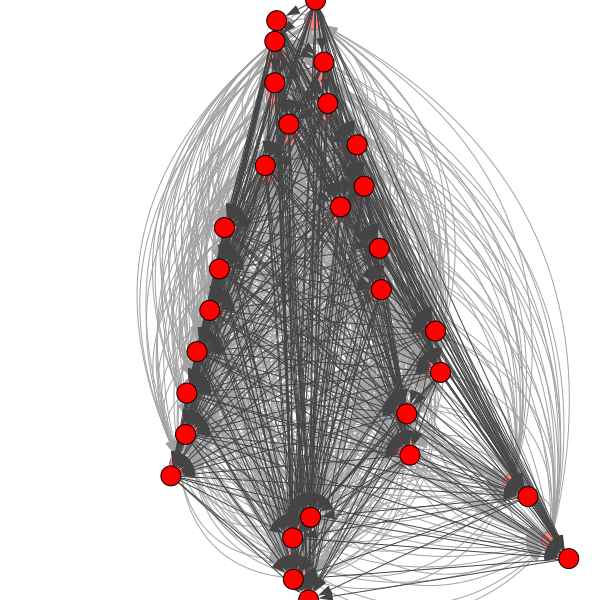

In [48]:
dag = g.subgraph_edges(edges=exact, delete_vertices=False)
layout = dag.layout_sugiyama(ori)
plot = ig.plot(g, opacity=.5, layout=layout)
plot.add(dag, layout=layout)
plot